# Logistic Regression - Implementation

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
X, y = make_classification(
    n_samples=2000, # 1000 observations
    n_informative = 2,
    n_features=4, # 5 total features
    n_classes=2, # binary target/label 
    random_state=0 # if you want reproducible dataset
)

In [3]:
X.shape, y.shape

((2000, 4), (2000,))

In [4]:
print(y)

[1 0 1 ... 0 0 0]


In [5]:
def scatter_plot(X,y, hue = True):
    if hue:
        plt.scatter(X[:, 0], X[:, 1], c=y)
    else:
        plt.scatter(X[:, 0], X[:, 1])
    plt.show()

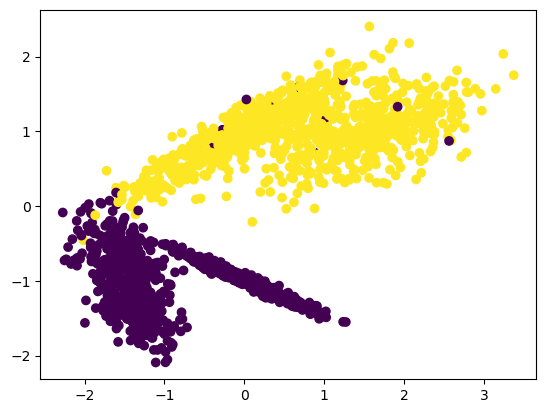

In [6]:
scatter_plot(X[:,:2], y)

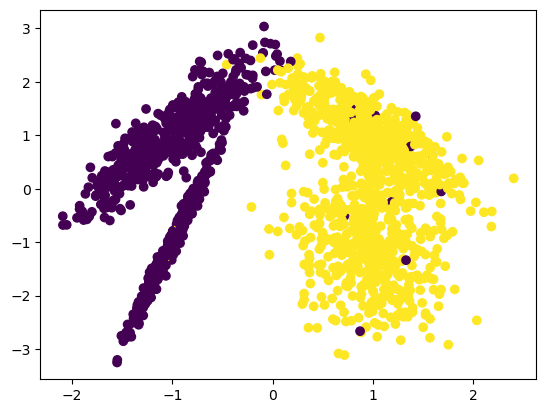

In [7]:
scatter_plot(X[:,1:3], y)

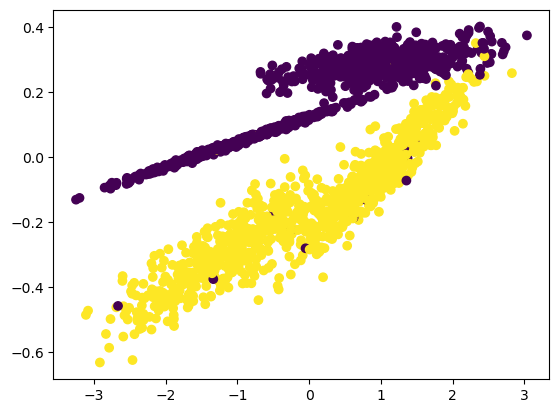

In [8]:
scatter_plot(X[:,2:4], y)

In [9]:
def normalize(X):
    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    
    return (X-mean)/std

In [10]:
X = normalize(X)

In [11]:
pd.DataFrame(X).head()

,0,1,2,3
0,-0.175564,0.619498,0.732813,0.005447
1,-1.456143,-1.336074,0.737719,1.534021
2,0.279799,1.233741,0.664139,-0.519441
3,0.288951,1.175322,0.604388,-0.513718
4,1.369073,0.910340,-0.978877,-1.362763


In [12]:
n_features = X.shape[1]
n_features

4

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
X_train.shape, y_train.shape

((1400, 4), (1400,))

In [15]:
X_test.shape, y_test.shape

((600, 4), (600,))

In [16]:
# Logistic Regression Model

In [17]:
def sigmoid(z):
    func = 1/(1+np.exp(-z))
    return func

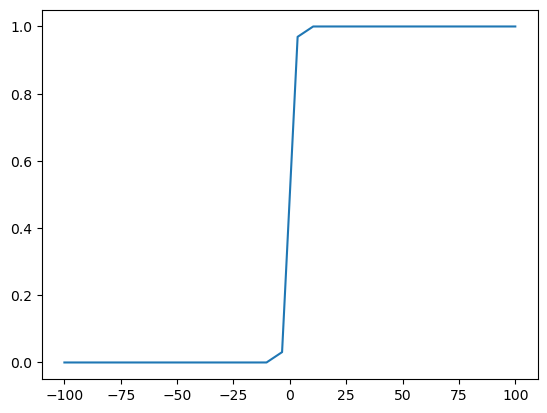

In [18]:
vals = np.linspace(-100,100, 30)
plt.plot(vals, sigmoid(vals))
plt.show()

In [19]:
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

In [20]:
def loss_binary_cross_entropy(y, y_pred):
    loss = -1*np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return loss

In [21]:
def gradient(X,y, y_pred):
    m = X.shape[0]
    grad = (-1/m)*np.dot(X.T, (y-y_pred))
    return grad

In [22]:
def preprocess_data(X):
    if X.shape[1] == n_features:
        rows = X.shape[0]
        X = np.hstack((np.ones((rows,1)), X))
    return X

In [23]:
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

In [24]:
X_train.shape, X_test.shape

((1400, 5), (600, 5))

In [25]:
y_train.shape, y_test.shape

((1400,), (600,))

In [26]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [27]:
y_train.shape, y_test.shape

((1400, 1), (600, 1))

In [28]:
def training(X,y, learning_rate = 0.1, max_iter = 300):
    
    n_features = X.shape[1]
    # randomly initialize theta
    theta = np.random.randn(n_features,1)
    error_list = []
    #print(f"X shape: {X.shape}\nTheta shape: {theta.shape}")
    
    for i in range(max_iter):
        #print(f"================ Iter {i} ================")
        y_pred = hypothesis(X,theta)
        
        error = loss_binary_cross_entropy(y,y_pred)
        error_list.append(error)
        
        grad = gradient(X,y,y_pred)
        theta = theta - learning_rate*grad
    
    plt.plot(error_list)
    plt.show()
    return theta

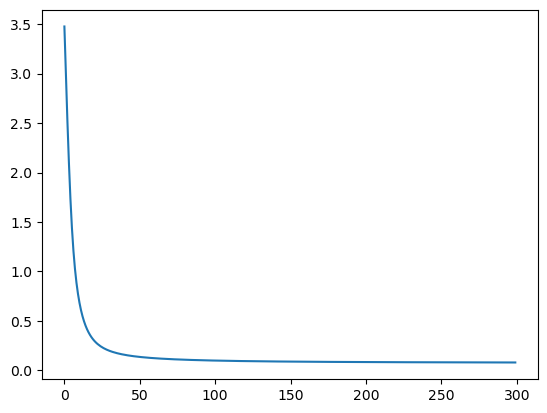

In [29]:
theta = training(X_train,y_train, learning_rate=0.3)

In [30]:
# predictions

y_pred_prob = hypothesis(X_test, theta)

In [31]:
y_pred_prob[:6]

array([[0.18231485],
       [0.99279328],
       [0.98536614],
       [0.01464649],
       [0.99697848],
       [0.99519041]])

In [41]:
def predict(X,theta):
    y_pred_prob = hypothesis(X, theta)
    y_pred = np.where(y_pred_prob<0.5,0,1)
    return y_pred

In [42]:
y_pred_train = predict(X_train, theta)
y_pred_test = predict(X_test, theta)

In [43]:
y_pred_train[:6]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [44]:
y_pred_test[:6]

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [45]:
def accuracy(y,y_pred):
    return round(((y==y_pred).sum()/y.shape[0])*100,2)

In [46]:
X_train.shape, y_train.shape, y_pred_train.shape

((1400, 5), (1400, 1), (1400, 1))

In [47]:
X_test.shape, y_test.shape, y_pred_test.shape

((600, 5), (600, 1), (600, 1))

In [48]:
accuracy(y_train, y_pred_train)

99.07

In [49]:
accuracy(y_test, y_pred_test)

98.33

##  Multiclass classification

In [51]:
from sklearn.datasets import make_blobs

In [52]:
X,y = make_blobs(n_samples=2000, n_features=2, cluster_std=3, centers=3, random_state=42)

In [53]:
X.shape, y.shape

((2000, 2), (2000,))

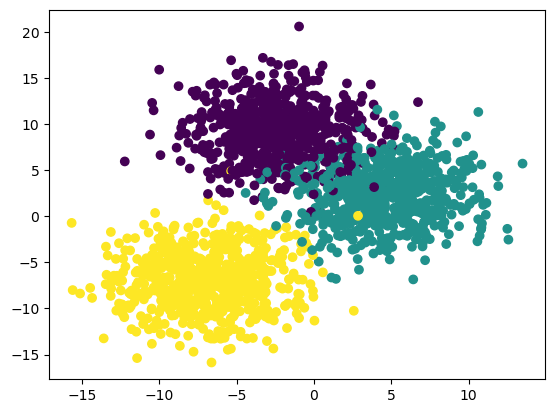

In [55]:
plt.scatter(X[:, 0], X[:,1], c = y)
plt.show()

In [56]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([667, 667, 666], dtype=int64))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
X_train.shape, y_train.shape

((1400, 2), (1400,))

In [62]:
X_test.shape, y_test.shape

((600, 2), (600,))

In [59]:
model = LogisticRegression(multi_class='ovr')

In [63]:
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [64]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [66]:
y_pred_train[:6]

array([0, 1, 2, 1, 0, 2])

In [67]:
y_pred_test[:6]

array([2, 2, 2, 2, 1, 0])

In [68]:
model.score(X_test, y_test)

0.965

In [71]:
model2 = LogisticRegression(multi_class='multinomial')

In [72]:
model2.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [73]:
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

In [74]:
y_pred_train[:6]

array([0, 1, 2, 1, 0, 2])

In [75]:
y_pred_test[:6]

array([2, 2, 2, 2, 1, 0])

In [76]:
model.score(X_test, y_test)

0.965